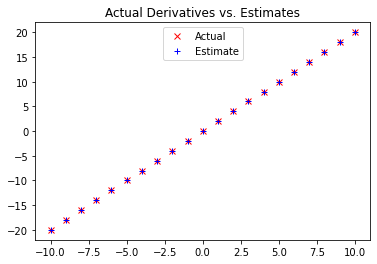

0 [-8.807419043822808, -6.244141812361637, 6.964736300658631]
1 [-8.631270662946351, -6.119258976114404, 6.825441574645458]
2 [-8.458645249687423, -5.996873796592116, 6.688932743152549]
3 [-8.289472344693674, -5.876936320660273, 6.555154088289497]
4 [-8.123682897799801, -5.759397594247067, 6.424051006523707]
5 [-7.9612092398438055, -5.644209642362126, 6.295569986393233]
6 [-7.801985055046929, -5.531325449514884, 6.169658586665369]
7 [-7.64594535394599, -5.420698940524586, 6.046265414932061]
8 [-7.49302644686707, -5.312284961714094, 5.92534010663342]
9 [-7.343165917929729, -5.206039262479813, 5.806833304500751]
10 [-7.196302599571134, -5.101918477230217, 5.690696638410736]
11 [-7.052376547579712, -4.9998801076856125, 5.576882705642521]
12 [-6.911329016628118, -4.899882505531901, 5.46534505152967]
13 [-6.773102436295556, -4.801884855421263, 5.356038150499077]
14 [-6.637640387569645, -4.705847158312838, 5.2489173874890955]
15 [-6.504887579818252, -4.611730215146581, 5.143939039739314]
16 

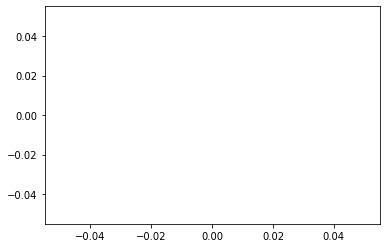

In [8]:
from ipynb.fs.full.DS_Linear_Algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x
'''

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))] '''


##################--------------------######################################
from ipynb.fs.full.DS_Linear_Algebra import Vector, dot, scalar_multiply, add
from typing import List, Callable

def e_i(i:int, n:int)->Vector:
    return [ 0  if j!=i else 1 for j in range(n)]

assert e_i(3, 5)==[0,0,0,1,0]

def different_quotient(f:Callable[[float], float], x:float, h:float)->float:
    return (f(x+h)-f(x7))/h

def partial_derive_i(f:[[Vector], float], i:int, v:Vector, h:float=0.001)->Vector:
    return f(add(v, scalar_multiply(h, e_i(i)))-f(v))/h

def estimate_gradient(f:Callable[[Vector], float], v:Vector, h:float=0.0001)->Vector:
    return [partial_derive_i(f, i, v, h=0.001) for i in range(len(v))]


def gradient_step(v:Vector, gradient:Vector, step_size:float)->Vector:
    step=scalar_multiply(step_size, gradient)
    return add(v+step)
#####################---------------------------------###############################


import random
from ipynb.fs.full.DS_Linear_Algebra  import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

def main():
    xs = range(-10, 11)
    actuals = [derivative(x) for x in xs]
    estimates = [difference_quotient(square, x, h=0.001) for x in xs]
    
    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    plt.title("Actual Derivatives vs. Estimates")
    plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
    plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
    plt.legend(loc=9)
    plt.show()
    
    
    plt.plot()
    
    def partial_difference_quotient(f: Callable[[Vector], float],
                                    v: Vector,
                                    i: int,
                                    h: float) -> float:
        """Returns the i-th partial difference quotient of f at v"""
        w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
             for j, v_j in enumerate(v)]
    
        return (f(w) - f(v)) / h
    
    
    # "Using the Gradient" example
    
    # pick a random starting point
    v = [random.uniform(-10, 10) for i in range(3)]
    
    for epoch in range(1000):
        grad = sum_of_squares_gradient(v)    # compute the gradient at v
        v = gradient_step(v, grad, -0.01)    # take a negative gradient step
        print(epoch, v)
    
    assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0
    
    
    # First "Using Gradient Descent to Fit Models" example
    
    from ipynb.fs.full.DS_Linear_Algebra  import vector_mean
    
    # Start with random values for slope and intercept.
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    learning_rate = 0.001
    
    for epoch in range(5000):
        # Compute the mean of the gradients
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
        # Take a step in that direction
        theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
    
    # Minibatch gradient descent example
    
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    for epoch in range(1000):
        for batch in minibatches(inputs, batch_size=20):
            grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
            theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
    
    # Stochastic gradient descent example
    
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    for epoch in range(100):
        for x, y in inputs:
            grad = linear_gradient(x, y, theta)
            theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
if __name__ == "__main__": main()

In [7]:
from ipynb.fs.full.DS_Statistics import mean, standard_deviation, dot
from typing import List
Vector=List[float]

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

import random
from ipynb.fs.full.DS_Linear_Algebra import  distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

def main():
    xs = range(-10, 11)
    actuals = [derivative(x) for x in xs]
    estimates = [difference_quotient(square, x, h=0.001) for x in xs]
    
    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    plt.title("Actual Derivatives vs. Estimates")
    plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
    plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
    plt.legend(loc=9)
    # plt.show()
    
    
    plt.close()
    
    def partial_difference_quotient(f: Callable[[Vector], float],
                                    v: Vector,
                                    i: int,
                                    h: float) -> float:
        """Returns the i-th partial difference quotient of f at v"""
        w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
             for j, v_j in enumerate(v)]
    
        return (f(w) - f(v)) / h
    
    
    # "Using the Gradient" example
    
    # pick a random starting point
    v = [random.uniform(-10, 10) for i in range(3)]
    
    for epoch in range(1000):
        grad = sum_of_squares_gradient(v)    # compute the gradient at v
        v = gradient_step(v, grad, -0.01)    # take a negative gradient step
        print(epoch, v)
    
    assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0
    
    
    # First "Using Gradient Descent to Fit Models" example
     
    from ipynb.fs.full.DS_Statistics import mean, standard_deviation, dot, vector_mean
    
    # Start with random values for slope and intercept.
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    learning_rate = 0.001
    
    for epoch in range(5000):
        # Compute the mean of the gradients
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
        # Take a step in that direction
        theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
    
    # Minibatch gradient descent example
    
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    for epoch in range(1000):
        for batch in minibatches(inputs, batch_size=20):
            grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
            theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
    
    # Stochastic gradient descent example
    
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    for epoch in range(100):
        for x, y in inputs:
            grad = linear_gradient(x, y, theta)
            theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
if __name__ == "__main__": main()

0 [6.733561365578929, -8.735509921345942, 8.688873034741128]
1 [6.59889013826735, -8.560799722919024, 8.515095574046306]
2 [6.466912335502004, -8.389583728460643, 8.34479366256538]
3 [6.337574088791964, -8.22179205389143, 8.177897789314072]
4 [6.210822607016125, -8.057356212813602, 8.01433983352779]
5 [6.086606154875803, -7.89620908855733, 7.854053036857235]
6 [5.964874031778287, -7.738284906786183, 7.69697197612009]
7 [5.845576551142721, -7.5835192086504595, 7.543032536597688]
8 [5.728665020119867, -7.43184882447745, 7.392171885865735]
9 [5.61409171971747, -7.283211847987901, 7.24432844814842]
10 [5.50180988532312, -7.137547611028143, 7.099441879185451]
11 [5.3917736876166575, -6.99479665880758, 6.957453041601743]
12 [5.2839382138643245, -6.8549007256314285, 6.8183039807697075]
13 [5.178259449587038, -6.7178027111188, 6.681937901154313]
14 [5.074694260595297, -6.583446656896424, 6.548299143131227]
15 [4.973200375383391, -6.451777723758496, 6.417333160268602]
16 [4.873736367875724, -6.

ImportError: cannot import name 'vector_mean' from 'ipynb.fs.full.DS_Statistics' (unknown location)